# To Construct Skinv2 Dataset


1.   [**HAM10000 Dataset**]((https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T)
2.   Loads metadata from a CSV file.
3.   Creates directories for each class of skin images.
4.   Defines a function to determine which directory contains the image based on its ID.
5.   Moves images into their respective class directories based on the metadata.














In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import shutil

# Load the metadata
metadata_path = '/content/drive/MyDrive/Skin/HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Assuming you know the directory of part 1 and part 2
part1_path = '/content/drive/MyDrive/Skin/HAM10000_images_part_1'
part2_path = '/content/drive/MyDrive/Skin/HAM10000_images_part_2'

# Make directories for each class
classes = metadata['dx'].unique()
for _class in classes:
    os.makedirs(f'/content/drive/MyDrive/Skinv2/{_class}', exist_ok=True)

# Function to determine the part path
def get_image_part_path(image_id):
    # Here, you should implement the logic to determine whether the image
    # is in part 1 or part 2. This is a simple placeholder:
    if os.path.exists(os.path.join(part1_path, f"{image_id}.jpg")):
        return part1_path
    else:
        return part2_path

# Move images into class directories
for index, row in metadata.iterrows():
    image_id = row['image_id']
    image_class = row['dx']

    part_path = get_image_part_path(image_id)

    # Source path for the image
    source = os.path.join(part_path, f"{image_id}.jpg")
    # Destination path for the image
    destination = f'/content/drive/MyDrive/Skinv2/{image_class}/{image_id}.jpg'

    # Check if source file exists to prevent errors
    if os.path.exists(source):
        # Replace `shutil.move` with `shutil.copy` if you want to keep the original images
        shutil.move(source, destination)


This code lists the folders in the 'Skinv2' directory, displays one image from each class, and prints the distribution of images per class.

In [ ]:
import os
from PIL import Image
import IPython.display as display

# Define the path to your 'Skin2' directory
base_dir = '/content/drive/MyDrive/Skinv2'

# List the folders in your directory
class_folders = [folder for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))]

# Initialize a dictionary to hold the count of images per class
class_distribution = {}

# Display one image from each class
for folder in class_folders:
    folder_path = os.path.join(base_dir, folder)
    images = os.listdir(folder_path)

    # Update the distribution dictionary
    class_distribution[folder] = len(images)



# Print the distribution
print("Class Distribution:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count} images")


Class Distribution:
bkl: 1099 images
nv: 6705 images
df: 115 images
mel: 1113 images
vasc: 142 images
bcc: 514 images
akiec: 327 images








1.   It iterates over the class directories in the specified base directory.
2.   For each class directory, it counts the number of images present and stores this count in a dictionary.
3.   It then separates the class names and their respective image counts into two lists.
4.   Using Matplotlib, it creates a bar chart showing the distribution of images across classes.
5.   Finally, it displays the plot.



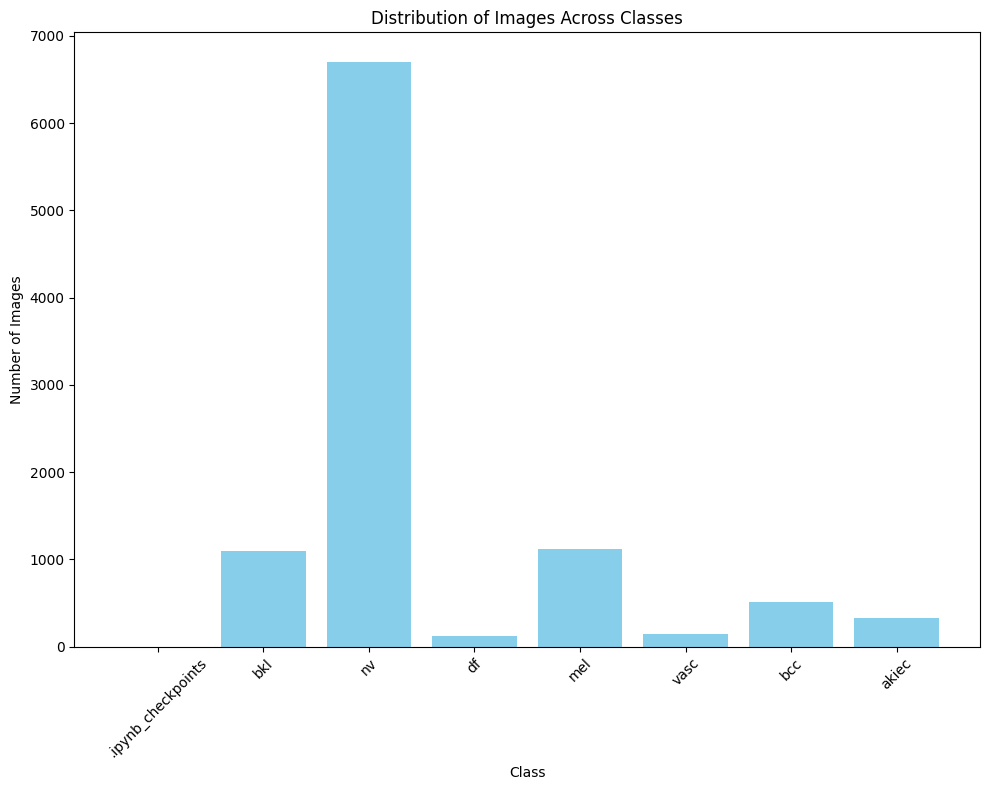

In [ ]:
import os
import matplotlib.pyplot as plt

# Imitating user's local environment structure, normally you'd use the real path.
# Here we assume that the class directories are immediate children of the base directory.
base_dir = '/content/drive/MyDrive/Skinv2'

# Get the list of class directories.
class_folders = next(os.walk(base_dir))[1]

# Initialize a dictionary to hold the count of images per class.
class_distribution = {}

# For each class directory, count the number of images and store it.
for folder in class_folders:
    folder_path = os.path.join(base_dir, folder)
    images = os.listdir(folder_path)
    class_distribution[folder] = len(images)

# Convert the distribution into items for plotting.
classes, counts = zip(*class_distribution.items())

# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a file

# Show the plot
plt.show()


# To Construct Skinv3 Dataset




1.   It defines split ratios for creating the training, validation, and test sets.

2.   It specifies the class folders and the root directory where they are located.

3.  It creates a new root directory (new_root_dir) where the split dataset will be saved.

4.  For each class folder, it shuffles the files and splits them into training, validation, and test sets based on the defined ratios.

5.  It defines a function copy_files to copy files into destination directories.

6.  It copies the files into the respective folders (train, valid, test) in the new root directory according to the split.


In [ ]:
import os
import shutil
from glob import glob
import numpy as np

# Define the split ratios
train_ratio = 0.75
valid_ratio = 0.20
test_ratio = 0.05  # Usually, test_ratio would be set to 1 - train_ratio - valid_ratio

# Define your class folders and the root directory where they are located
class_folders = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
root_dir = '/content/drive/MyDrive/Skinv2'
new_root_dir = '/content/drive/MyDrive/Skinv3'  # New root directory to save the split dataset

# For each class folder, split the files and move them into the train/test/valid structure
for class_folder in class_folders:
    # List all files in the class folder
    all_files = glob(os.path.join(root_dir, class_folder, '*'))

    # Shuffle the list of files for random split
    np.random.shuffle(all_files)

    # Calculate split indices
    train_end = int(len(all_files) * train_ratio)
    valid_end = train_end + int(len(all_files) * valid_ratio)

    # Split the files
    train_files = all_files[:train_end]
    valid_files = all_files[train_end:valid_end]
    test_files = all_files[valid_end:]

    # Function to copy files to a destination directory
    def copy_files(files, dest_folder):
        os.makedirs(dest_folder, exist_ok=True)
        for f in files:
            shutil.copy(f, dest_folder)

    # Copy the files into the respective folders in the new root directory
    copy_files(train_files, os.path.join(new_root_dir, 'train', class_folder))
    copy_files(valid_files, os.path.join(new_root_dir, 'valid', class_folder))
    copy_files(test_files, os.path.join(new_root_dir, 'test', class_folder))


In [ ]:
import pandas as pd
import os

# Load the CSV file
csv_file = '/content/drive/MyDrive/Skin/HAM10000_metadata.csv'
df = pd.read_csv(csv_file)

# Define the dataset directory
dataset_dir = '/content/drive/MyDrive/Skinv3'

# Define subfolders
subfolders = ['train', 'valid', 'test']

# Define class names
class_names = ["bkl", "nv", "df", "mel", "vasc", "bcc", "akiec"]

# Function to check if images are correctly labeled in the CSV file
def check_labels(row):
    image_id = row['image_id']
    current_class_name = row['dx'].lower()  # Convert to lowercase to match folder names

    # Check each subfolder for the correct class subdirectory
    found_path = None
    for subfolder in subfolders:
        # Construct the path to the class subdirectory
        class_subdir = os.path.join(dataset_dir, subfolder, current_class_name)
        potential_path = os.path.join(class_subdir, f"{image_id}.jpg")
        if os.path.exists(potential_path):
            found_path = potential_path
            break

    # If the image file was found, the label is correct
    return (found_path is not None), found_path, current_class_name

# Apply the function to the DataFrame
df['label_correct'], df['found_path'], df['current_class'] = zip(*df.apply(check_labels, axis=1))

# Check for any correctly labeled images
correct_labels = df[df['label_correct']]

# Display any correctly labeled images
if correct_labels.empty:
    print("No correctly labeled images found.")
else:
    print("Correctly labeled images found:")
    print(correct_labels[['image_id', 'found_path', 'current_class']])

Correctly labeled images found:
           image_id                                         found_path  \
0      ISIC_0027419  /content/drive/MyDrive/Skinv3/train/bkl/ISIC_0...   
1      ISIC_0025030  /content/drive/MyDrive/Skinv3/valid/bkl/ISIC_0...   
2      ISIC_0026769  /content/drive/MyDrive/Skinv3/train/bkl/ISIC_0...   
3      ISIC_0025661  /content/drive/MyDrive/Skinv3/train/bkl/ISIC_0...   
4      ISIC_0031633  /content/drive/MyDrive/Skinv3/valid/bkl/ISIC_0...   
...             ...                                                ...   
10010  ISIC_0033084  /content/drive/MyDrive/Skinv3/train/akiec/ISIC...   
10011  ISIC_0033550  /content/drive/MyDrive/Skinv3/train/akiec/ISIC...   
10012  ISIC_0033536  /content/drive/MyDrive/Skinv3/train/akiec/ISIC...   
10013  ISIC_0032854  /content/drive/MyDrive/Skinv3/train/akiec/ISIC...   
10014  ISIC_0032258  /content/drive/MyDrive/Skinv3/train/mel/ISIC_0...   

      current_class  
0               bkl  
1               bkl  
2            

# To Train Model


**Preliminary Steps**
---
1.   Upload the dateset into your drive in MyDrive location
2.   At the end of your drive folder structure will be like that

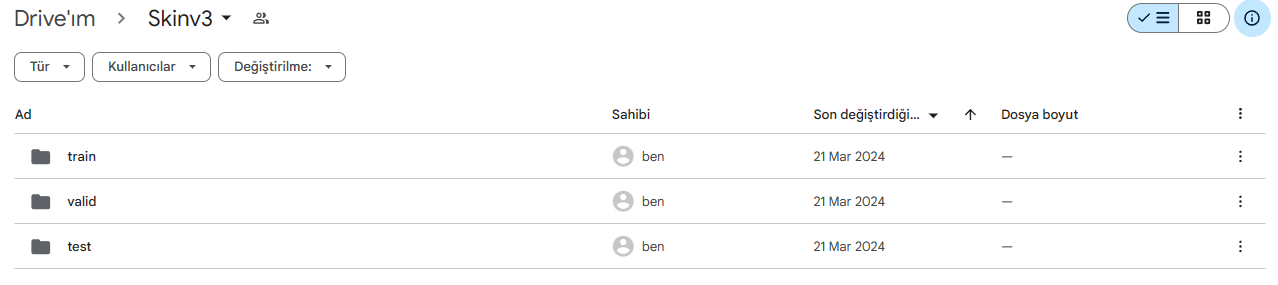
3. Run the below cell to mount your drive
4. Select one of the model at below and run 1 cell

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Choose one of the model and Run

# Inception-v3


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Update input size
input_size = (256, 256)
model_name = "Inception-v3"
# Define the Inception-v3 model without pre-trained weights
model = Sequential([
    InceptionV3(input_shape=(input_size[0], input_size[1], 3), include_top=False, weights='imagenet'),
    GlobalAveragePooling2D(),
    Dropout(0.5), # Add dropout
    Dense(units=7, activation='softmax', dtype='float64')
])
# Print model summaries
print("Inception-v3 Model Summary:")
model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Inception-v3 Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 7)                 14343     
                                                                 
Total params: 21817127 (83.28 MB)
Trainable params: 21782695 (83.15 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________

# DenseNet-201




In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Update input size
input_size = (256, 256)
model_name = "DenseNet-201"

# Define the DenseNet-201 model without pre-trained weights
densenet201_model = Sequential([
    DenseNet201(input_shape=(input_size[0], input_size[1], 3), include_top=False, weights='imagenet'),
    GlobalAveragePooling2D(),
    Dropout(0.5), # Add dropout
    Dense(units=7, activation='softmax', dtype='float64')
])
# Print model summaries
print("DenseNet-201 Model Summary:")
model.summary()

DenseNet-201 Model Summary:
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 5 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_15 (Dropout)        (None, 2048)              0         
                                                                 
 dense_15 (Dense)            (None, 7)                 14343     
                                                                 
Total params: 21817127 (83.28 MB)
Trainable params: 21782695 (83.15 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


# MobileNet-v2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
# Update input size
input_size = (224, 224)
model_name = "MobileNet-v2"

# Define the MobileNetV2 model without pre-trained weights
model = Sequential([
    MobileNetV2(input_shape=(input_size[0], input_size[1], 3), include_top=False, weights='imagenet'),
    GlobalAveragePooling2D(),
    Dropout(0.5), # Add dropout
    Dense(units=7, activation='softmax', dtype='float64')
])
# Print model summaries
print("MobileNet-v2 Model Summary:")
model.summary()


MobileNet-v2 Model Summary:
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 8 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_18 (Dropout)        (None, 1280)              0         
                                                                 
 dense_18 (Dense)            (None, 7)                 8967      
                                                                 
Total params: 2266951 (8.68 MB)
Trainable params: 2232839 (8.55 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________

# MobileNet-v3

In [ ]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Update input size
input_size = (224, 224)  # Using the original input size
model_name = "MobileNet-v3"

# Define the MobileNet-v3 Large model with pre-trained ImageNet weights
model = Sequential([
    MobileNetV3Large(input_shape=(input_size[0], input_size[1], 3), include_top=False, weights='imagenet'),
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Add dropout to prevent overfitting
    Dense(units=7, activation='softmax', dtype='float64')  # Output layer for 7 classes
])

# Print model summary
print("MobileNet-v3 Model Summary:")
model.summary()


MobileNet-v3 Model Summary:
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 7, 7, 960)         2996352   
 al)                                                             
                                                                 
 global_average_pooling2d_9  (None, 960)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_9 (Dropout)         (None, 960)               0         
                                                                 
 dense_9 (Dense)             (None, 7)                 6727      
                                                                 
Total params: 3003079 (11.48 MB)
Trainable params: 2978679 (11.39 MB)
Non-trainable params: 24400 (95.31 KB)
_________________________________________________

# ResNet-101

In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

input_size = (256, 256)
model_name = "ResNet-101"

# Define the ResNet-101 model with pre-trained weights
model = Sequential([
    ResNet101(input_shape=(input_size[0], input_size[1], 3), include_top=False, weights='imagenet'),
    GlobalAveragePooling2D(),
    Dropout(0.5), # Add dropout
    Dense(units=7, activation='softmax', dtype='float64')
])


# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 8, 8, 2048)        42658176  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 42672519 (162.84 MB)
Trainable params: 42567175 (162.44 MB)
Non-trainable params: 105344 (411.50 KB)
_________________________________________________________________


# ResNet-50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Update input size
input_size = (256, 256)
model_name = "ResNet-50"

# Define the ResNet-50 model without pre-trained weights
model = Sequential([
    ResNet50(input_shape=(input_size[0], input_size[1], 3), include_top=False, weights='imagenet'),
    GlobalAveragePooling2D(),
    Dropout(0.5), # Add dropout
    Dense(units=7, activation='softmax', dtype='float64')
])

# Print model summary
print("ResNet-50 Model Summary:")
model.summary()


ResNet-50 Model Summary:
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 9 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_19 (Dropout)        (None, 2048)              0         
                                                                 
 dense_19 (Dense)            (None, 7)                 14343     
                                                                 
Total params: 23602055 (90.09 MB)
Trainable params: 23548935 (89.89 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


# Xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Update input size
input_size = (256, 256)
model_name = "Xception"

# Define the Xception model without pre-trained weights
model = Sequential([
    Xception(input_shape=(input_size[0], input_size[1], 3), include_top=False, weights='imagenet'),
    GlobalAveragePooling2D(),
    Dropout(0.5), # Add dropout
    Dense(units=7, activation='softmax', dtype='float64')
])

# Print model summary
print("Xception Model Summary:")
model.summary()


Xception Model Summary:
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_20 (Dropout)        (None, 2048)              0         
                                                                 
 dense_20 (Dense)            (None, 7)                 14343     
                                                                 
Total params: 20875823 (79.69 MB)
Trainable params: 20821295 (79.48 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


# Inception-ResNet-v2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Update input size
input_size = (256, 256)
model_name = "Inception-ResNet-v2"
# Define the Inception-ResNet-v2 model without pre-trained weights
model = Sequential([
    InceptionResNetV2(input_shape=(input_size[0], input_size[1], 3), include_top=False, weights='imagenet'),
    GlobalAveragePooling2D(),
    Dropout(0.5), # Add dropout
    Dense(units=7, activation='softmax', dtype='float64')
])

# Print model summary
print("Inception-ResNet-v2 Model Summary:")
model.summary()


Inception-ResNet-v2 Model Summary:
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 6, 6, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d_2  (None, 1536)              0         
 1 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_21 (Dropout)        (None, 1536)              0         
                                                                 
 dense_21 (Dense)            (None, 7)                 10759     
                                                                 
Total params: 54347495 (207.36 MB)
Trainable params: 54286951 (207.13 MB)
Non-trainable params: 60544 (236.50 KB)
____________________________________

# NASNet-Mobile

In [ ]:
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Update input size
input_size = (256, 256)
model_name = "NASNet-Mobile"

# Define the NASNet-Mobile model without pre-trained weights
model = Sequential([
    NASNetMobile(input_shape=(input_size[0], input_size[1], 3), include_top=False, weights='imagenet'),
    GlobalAveragePooling2D(),
    Dropout(0.5), # Add dropout
    Dense(units=7, activation='softmax', dtype='float64')
])

# Print model summary
print("NASNet-Mobile Model Summary:")
model.summary()


NASNet-Mobile Model Summary:
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 8, 8, 1056)        4269716   
                                                                 
 global_average_pooling2d_2  (None, 1056)              0         
 2 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_22 (Dropout)        (None, 1056)              0         
                                                                 
 dense_22 (Dense)            (None, 7)                 7399      
                                                                 
Total params: 4277115 (16.34 MB)
Trainable params: 4240377 (16.20 MB)
Non-trainable params: 36738 (143.51 KB)
_________________________________________________________________


# EfficientNet-b0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Update input size
input_size = (256, 256)
model_name = "EfficientNet-B0"
# Define the EfficientNet-B0 model without pre-trained weights
model = Sequential([
    EfficientNetB0(input_shape=(input_size[0], input_size[1], 3), include_top=False, weights='imagenet'),
    GlobalAveragePooling2D(),
    Dropout(0.5), # Add dropout
    Dense(units=7, activation='softmax', dtype='float64')
])

# Print model summary
print("EfficientNet-B0 Model Summary:")
model.summary()


EfficientNet-B0 Model Summary:
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
 3 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_23 (Dropout)        (None, 1280)              0         
                                                                 
 dense_23 (Dense)            (None, 7)                 8967      
                                                                 
Total params: 4058538 (15.52 MB)
Trainable params: 4016515 (15.36 MB)
Non-trainable params: 42023 (164.16 KB)
____________________________________________

# New Section Training The Model
In this section you will run the code below and copy the console outputs and paste them into **training.txt** file this folder should located in related model result file.

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define paths to dataset directories
dataset_path = "/content/drive/MyDrive/Skinv3"
result_path = "/content/drive/MyDrive/Result"
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "valid")
test_dir = os.path.join(dataset_path, "test")

# Define batch size and input size
batch_size = 4
input_size = (256, 256)

# Helper function to resize images in a dataset
def resize_images(image, label):
    image = tf.image.resize(image, input_size)
    return image, label

# Load and preprocess the training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=input_size,
    batch_size=batch_size).map(resize_images)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size=input_size,
    batch_size=batch_size,
    shuffle=True).map(resize_images)  # Shuffling the validation data

# Load and preprocess the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=input_size,
    batch_size=batch_size).map(resize_images)

# Define the optimizer, loss function, and metrics for the compilation
optimizer = Adam(learning_rate=0.00001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


# Define callbacks
logs_subfolder = "logs"
model_subfolder = model_name + "/model"  # Replace with your model name if needed
tensorboard_callback = TensorBoard(log_dir=os.path.join(result_path, model_name ,logs_subfolder), histogram_freq=1)
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)
checkpoint_loss = ModelCheckpoint(
    os.path.join(result_path, model_subfolder, 'best_loss_model.h5'),
    monitor='val_loss',
    save_best_only=True,
    verbose=1)

checkpoint_accuracy = ModelCheckpoint(
    os.path.join(result_path, model_subfolder, 'best_accuracy_model.h5'),
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='max')

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[tensorboard_callback, reduce_lr_callback, checkpoint_loss, checkpoint_accuracy]
)

# Save the final model state
final_model_save_path = os.path.join(result_path, model_subfolder, 'final_model.h5')
model.save(final_model_save_path)
print(f"Final model saved to {final_model_save_path}")


Found 602 files belonging to 7 classes.
Found 161 files belonging to 7 classes.
Found 42 files belonging to 7 classes.
Epoch 1/20
151/151 [==============================] - ETA: 0s - loss: 2.0565 - accuracy: 0.1728
Epoch 1: val_loss improved from inf to 1.90500, saving model to /content/drive/MyDrive/Result/Inception-v3/model/best_loss_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_accuracy improved from -inf to 0.22981, saving model to /content/drive/MyDrive/Result/Inception-v3/model/best_accuracy_model.h5
151/151 [==============================] - 488s 3s/step - loss: 2.0565 - accuracy: 0.1728 - val_loss: 1.9050 - val_accuracy: 0.2298 - lr: 1.0000e-05
Epoch 2/20
151/151 [==============================] - ETA: 0s - loss: 1.8961 - accuracy: 0.2458
Epoch 2: val_loss improved from 1.90500 to 1.73449, saving model to /content/drive/MyDrive/Result/Inception-v3/model/best_loss_model.h5

Epoch 2: val_accuracy improved from 0.22981 to 0.33540, saving model to /content/drive/MyDrive/Result/Inception-v3/model/best_accuracy_model.h5
151/151 [==============================] - 32s 212ms/step - loss: 1.8961 - accuracy: 0.2458 - val_loss: 1.7345 - val_accuracy: 0.3354 - lr: 1.0000e-05
Epoch 3/20
151/151 [==============================] - ETA: 0s - loss: 1.7344 - accuracy: 0.3422
Epoch 3: val_loss improved from 1.73449 to 1.65175, saving model to /content/drive/My

# Test the Model **(NECESSARILY TO RUN THIS SECTION)**
In this section you will run the code below and copy the console outputs and paste them into **test.txt** file this folder should located in related model result file. **If the model has F1 score under 0.80s or around 0.99s please let me know.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# Define input size and paths
input_size = (256, 256)
dataset_path = "/content/drive/MyDrive/Skinv5-2"
test_dir = os.path.join(dataset_path, "train")
batch_size = 4

# Load the saved model
model_path = f'/content/drive/MyDrive/Result/{model_name}/model/final_model.h5'
model = tf.keras.models.load_model(model_path)

# Helper function to resize images in a dataset
def resize_images(image, label):
    image = tf.image.resize(image, input_size)
    return image, label

# Load and preprocess the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=input_size,
    batch_size=batch_size).map(resize_images)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions for the test dataset
y_pred = []
y_true = []
for images, labels in test_ds.unbatch().batch(1):
    probs = model.predict(images)
    y_pred.append(np.argmax(probs, axis=1)[0])
    y_true.append(np.argmax(labels.numpy(), axis=1)[0])

# Calculate F1 score, Precision, Recall, and Confusion Matrix
f1_scores = classification_report(y_true, y_pred, output_dict=True, target_names=["bkl", "nv", "df", "mel", "vasc", "bcc", "akiec"])['weighted avg']['f1-score']
precision_scores = classification_report(y_true, y_pred, output_dict=True, target_names=["bkl", "nv", "df", "mel", "vasc", "bcc", "akiec"])['weighted avg']['precision']
recall_scores = classification_report(y_true, y_pred, output_dict=True, target_names=["bkl", "nv", "df", "mel", "vasc", "bcc", "akiec"])['weighted avg']['recall']
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"F1 Score: {f1_scores}")
print(f"Precision: {precision_scores}")
print(f"Recall: {recall_scores}")
print(f"Confusion Matrix:\n {conf_matrix}")


Found 602 files belonging to 7 classes.
151/151 [==============================] - 8s 40ms/step - loss: 0.1758 - accuracy: 0.9767
Test Loss: 0.17580021917819977
Test Accuracy: 0.9767441749572754
1/1 [==============================] - 0s 41ms/step
F1 Score: 0.9767392620347278
Precision: 0.9770728927764637
Recall: 0.9767441860465116
Confusion Matrix:
 [[85  0  0  1  0  0  0]
 [ 1 85  0  0  0  0  0]
 [ 1  0 82  0  2  1  0]
 [ 0  0  0 86  0  0  0]
 [ 2  0  0  0 82  1  1]
 [ 1  1  0  0  0 83  1]
 [ 0  0  0  0  1  0 85]]


# Monitors of the Performance Metrics **(NOT NECESSARILY TO RUN THIS SECTION)**

In [ ]:
# Load TensorBoard extension
%load_ext tensorboard

# Start TensorBoard within the notebook
%tensorboard --logdir /content/drive/MyDrive/Result/logs
